# Week 04 Notes: Linear Regression

Math is the language of science, Earth Science included, and linear algebra is the language of data.  Linear regression is just one piece of linear algebra (take GEOL 502 to learn more!), but it's an important one.  It's the first step into the more sophisticated but highly related algorithms that run large parts of our society and culture, from predictions about weather and stocks to the AI and machine learning tools that have huge potential.  

While you can perform linear regression in programs like Microsoft Excel, that regression is the end of the analysis -- it's limited in scope, in dimension, and in application.  In a programming language like Python, linear algebra can be the first step to analytical insights and new models.

As an example, we'll use some data from a recent Geology paper, 
[Geology Phanerozoic emergence of global continental collision and onset of massive crustal eclogitization](https://doi-org.www2.lib.ku.edu/10.1130/G52647.1)

Specifically, we'll examine the dataset depicted in Figure 2A, which is provided as an Excel workbook in the supplemental material.  I have extracted the relevant data into a comma separated values file and posted it on Canvas in the 'Week 4' module.  Download the .csv file into your 'Week04' class exercises folder while we talk through what the paper is trying to say.

## Step 1: Visualize the data!

Whenever you're working with a new dataset, the **very first thing to do** is: load your data into whatever software  you're using, then plot it.  We've performed these same tasks last week, so you should have a vague recollection of what to do now.  Here are some questions to guide you:

1. Which packages will you need to import in order to read the csv file and then plot the data?
1. We've never read in a csv file before.  Where would you find the documentation that describes how to do this?
1. In that documentation, where are the arguments to the function, and what does the function return?
1. How do you reference the columns of a dataframe to pick out the ones that you want?
1. How do you set up a figure and axes using MatPlotLib?
1. What is the MatPlotLib function for plotting and what arguments do you send it to make a scatter plot?

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

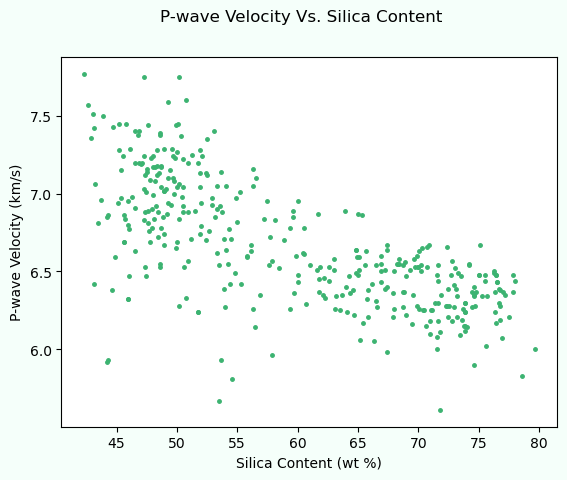

In [3]:
data = pd.read_csv( "Xia-et-al-2025_Supplemental-Data.csv" )

SiO2_wtpct = data[ "SiO2 (%)"]
Vp_kmps = data[ "Vp (km/s)" ]

#Make a figure
data_fig, data_axes = plt.subplots()
data_axes.plot(data["SiO2 (%)"], data["Vp (km/s)"], '.', color="mediumseagreen", markersize = 5 )

#Make it pretty!
data_fig.set_facecolor('mintcream')
data_axes.set_xlabel("Silica Content (wt %)")
data_axes.set_ylabel("P-wave Velocity (km/s)")
plt.suptitle("P-wave Velocity Vs. Silica Content")

plt.show()

## Step 2: Linear regression

_Time for a quick iPad lecture about linear models, linear systems of equations, and the assumptions that go along with them._

Now that you know what we want our system to look like, we need to build the pieces.  To do that, we'll use the linear algebra functionality of NumPy.  Note that the popular package `scikit-learn` has similar functionality plus a whole lot more,  We'll revisit this package later in the course.

### 2.1: Assemble a design matrix

First, we'll need to extract the vector of x-values, here our rock compositions quantified as SiO2 (%), and turn them into a NumPy vctor.  You can do that for an entire dataframe or for a series (just one column) using the `.to_numpy()` method of the dataframe or series.  

We'll also need to make a vector of ones.  But first we need to figure out how many ones we need!  To do that, we can use the `shape` property.  

Finally, we'll need to stack the two vectors as columns side-by-side.  There are several methods to "stack" NumPy arrays next to each other, but they take some getting used to.  `np.vstack` and `np.hstack` stack arrays vertically and horizontally, but lay vectors end-to-end.  We want `np.column_stack`.


In [5]:
#Change panda series to NumPy arrays
SiO2_wtpct.to_numpy()
Vp_kmps.to_numpy()

#Change NumPy arrays to vectors
SiO2_wtpct_vector = SiO2_wtpct.to_numpy()
Vp_kmps_vector = Vp_kmps.to_numpy()

#Create our vector full of ones, equal to number of samples
number_of_samples = SiO2_wtpct_vector.shape[0]
ones_vector = np.ones(number_of_samples)

#Tie vectors together to create a matrix
design_matrix = np.column_stack((SiO2_wtpct_vector, ones_vector))

### 2.2: Do the linear regression

To do the solve the least squares system, we'll use the function from NumPy's linear algebra library called `np.linalg.lstsq()`.  What are its inputs and what does it return?

In [7]:
#Do least square function, which gives us 4 outputs
unknowns_vector, sum_of_squares, rank, singular_values = np.linalg.lstsq(design_matrix, Vp_kmps_vector, rcond=None)

#We only care about the first output, so we rename the others to '_'
unknowns_vector, _, _, _ = np.linalg.lstsq(design_matrix, Vp_kmps_vector, rcond=None)

## Step 3: Plot the results

Now that you have the linear regression parameters, it's time to plot the results on top of the data!  

1. First, you'll need to pick out the slope and the intercept from the information returned by `np.linalg.lstsq()`.
2. Second, you'll need to create some x- and y-values to give to MatPlotLib to plot your line.
3. Add the plot to the axes you've already created and named.
4. Finally, to show the figure, just call the figure you created and named when you first plotted the data.

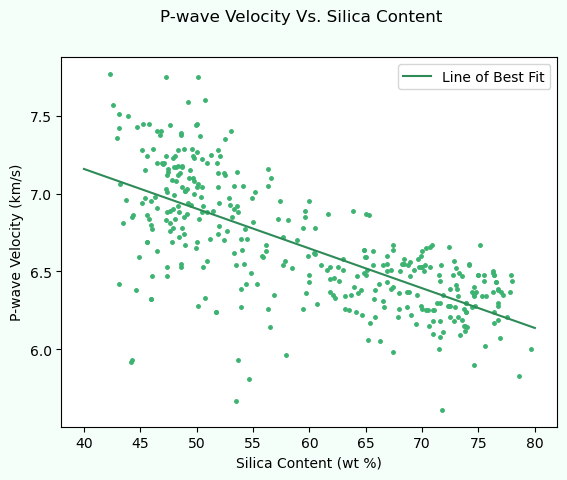

In [9]:
#1.
slope = unknowns_vector[0]
y_intercept = unknowns_vector[1]

#2.
x_values = np.linspace(40, 80, 9)
y_values = slope * x_values + y_intercept

#3.
data_axes.plot(x_values, y_values, '-', color='seagreen', label = 'Line of Best Fit')
data_axes.legend()

#4.
data_fig